Data Loading


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score,GridSearchCV

from sklearn.metrics import make_scorer, f1_score
import numpy as np

In [2]:
dataset = pd.read_csv('./diabetes.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**EDA**


In [3]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data Analysis - Deskripsi Variabel


In [4]:
isna_isnull = pd.DataFrame({
    'isna': dataset.isna().sum(),
    'isnull': dataset.isnull().sum(),
})

isna_isnull

,isna,isnull
Pregnancies,0,0
Glucose,0,0
BloodPressure,0,0
SkinThickness,0,0
Insulin,0,0
BMI,0,0
DiabetesPedigreeFunction,0,0
Age,0,0
Outcome,0,0


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
def build_boxplot(title: str):
    plt.figure(figsize=(16, 16))
    plt.title(title)
    for index, column in enumerate(dataset.columns, start=1):
        plt.subplot(3, 3, index)
        sns.boxplot(x=dataset[column])

CEK OUTLIER


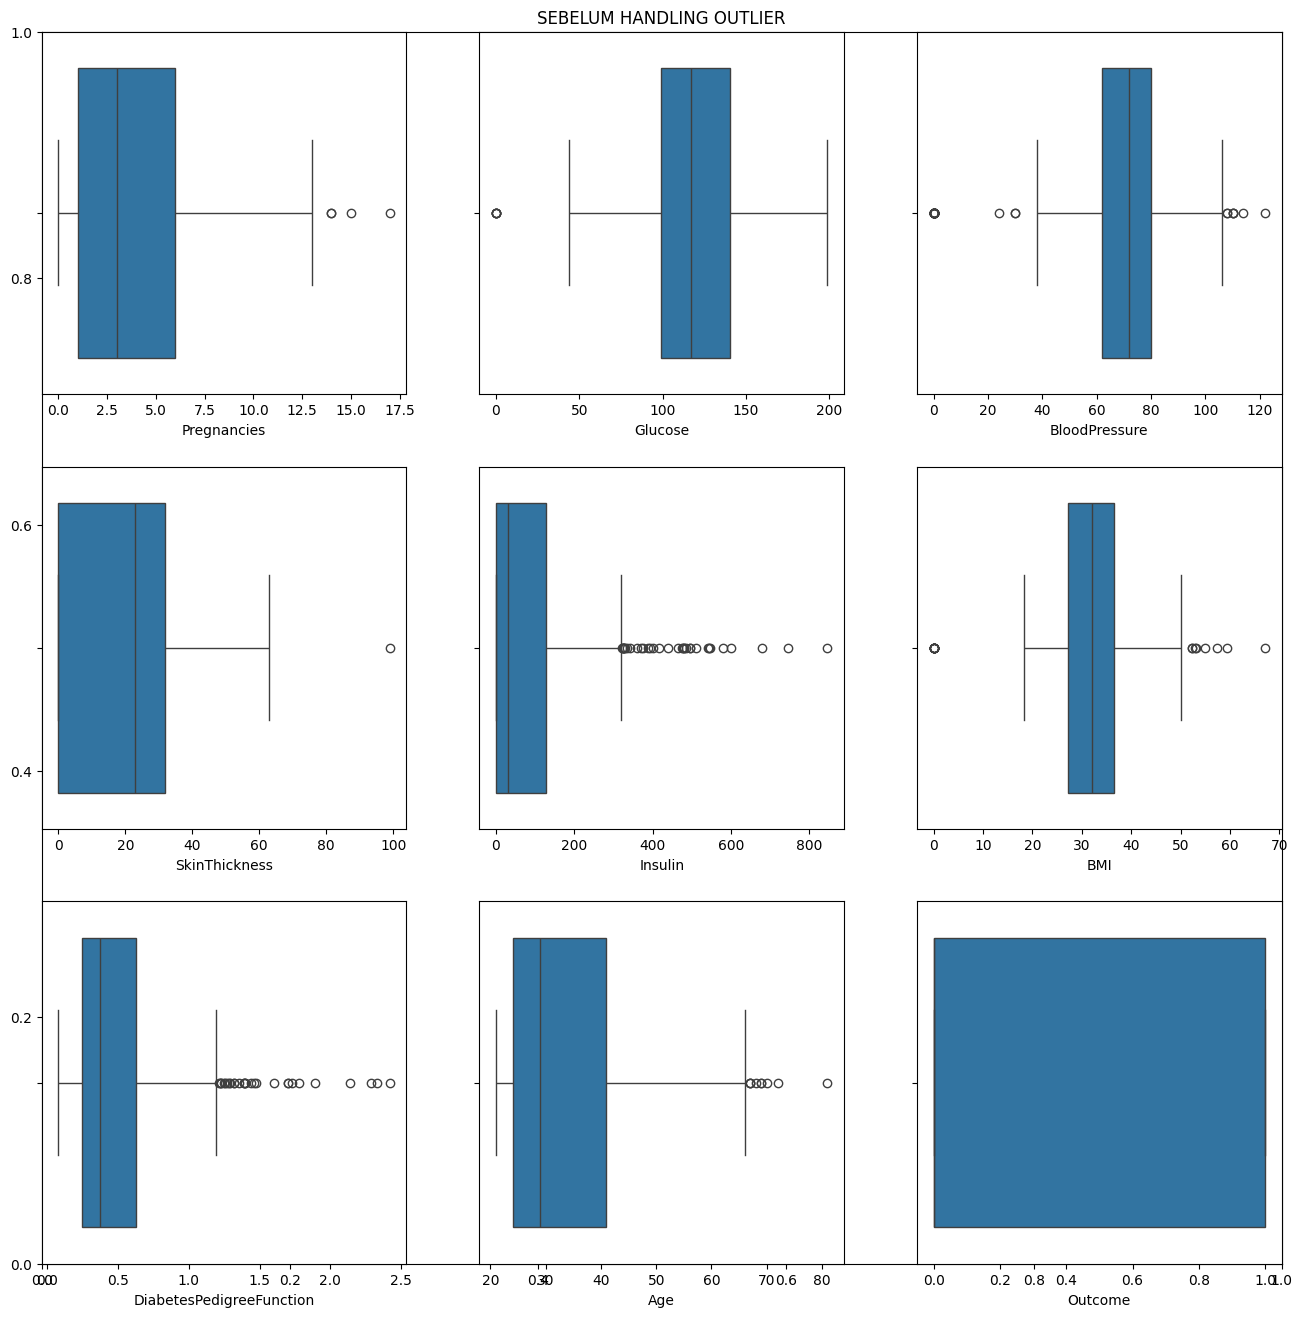

In [7]:
build_boxplot("SEBELUM HANDLING OUTLIER")

In [8]:
Q1 = dataset.quantile(0.25, numeric_only=True)
Q3 = dataset.quantile(0.75, numeric_only=True)
IQR = Q3-Q1

dataset = dataset[~((dataset < (Q1-1.5*IQR)) |
                    (dataset > (Q3+1.5*IQR))).any(axis=1)]

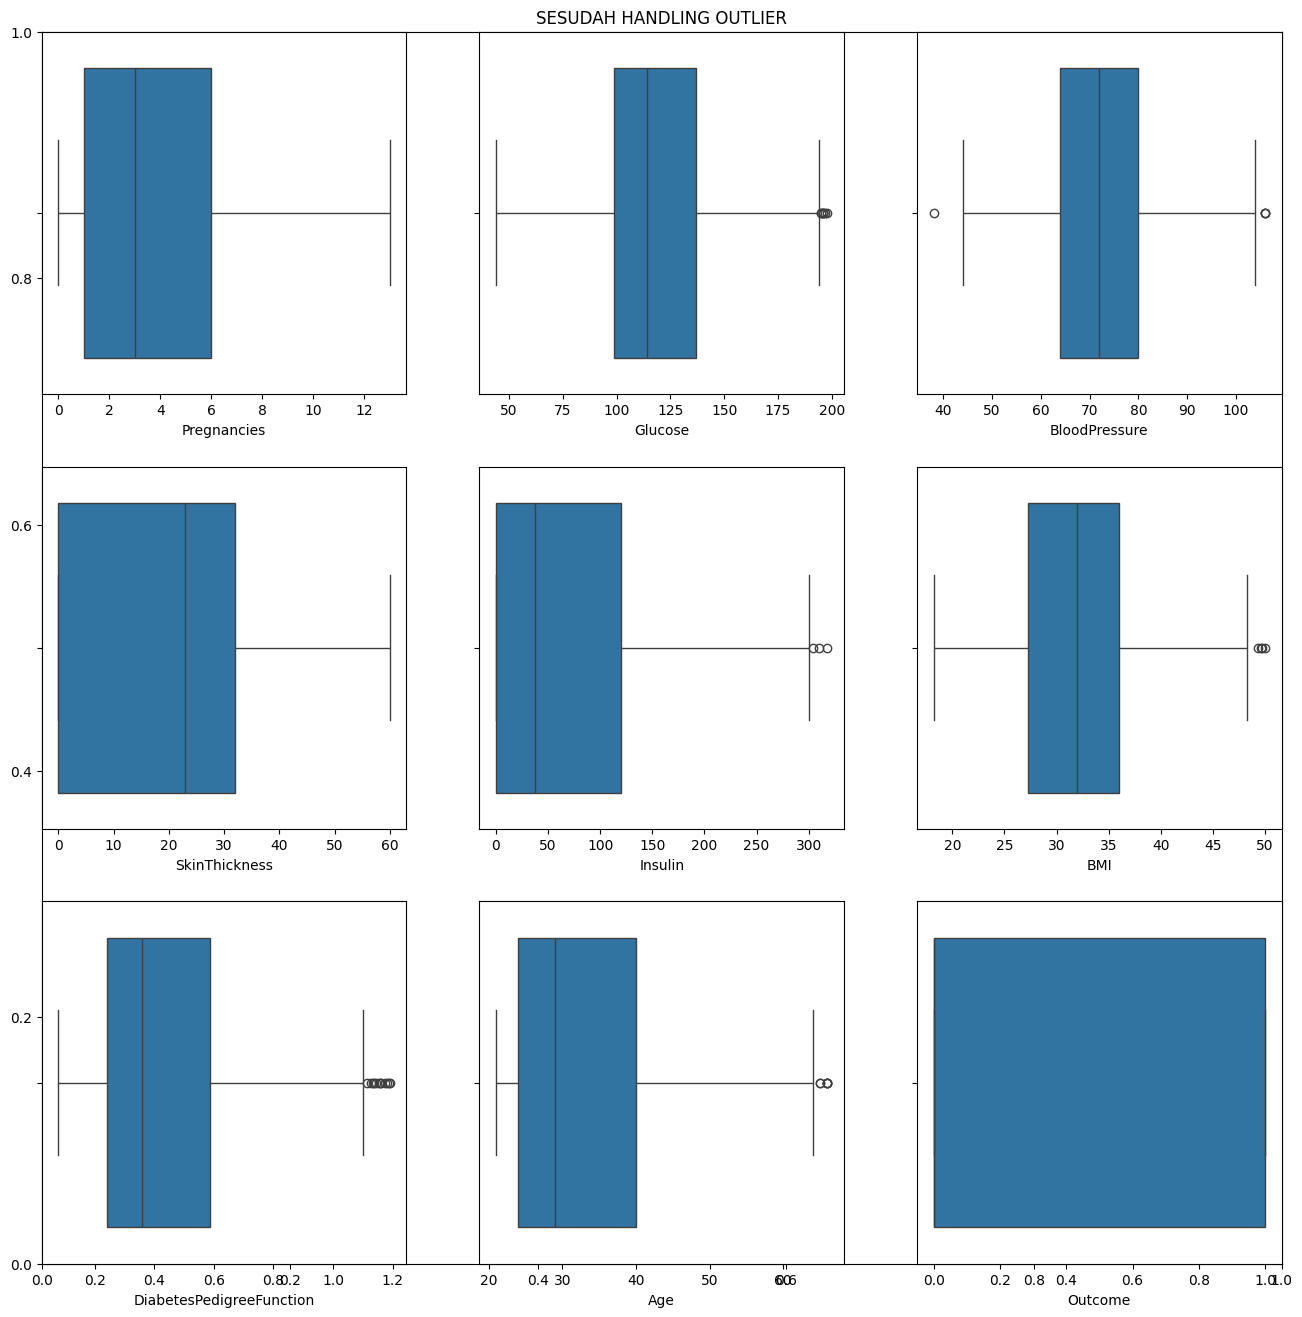

In [9]:
build_boxplot("SESUDAH HANDLING OUTLIER")

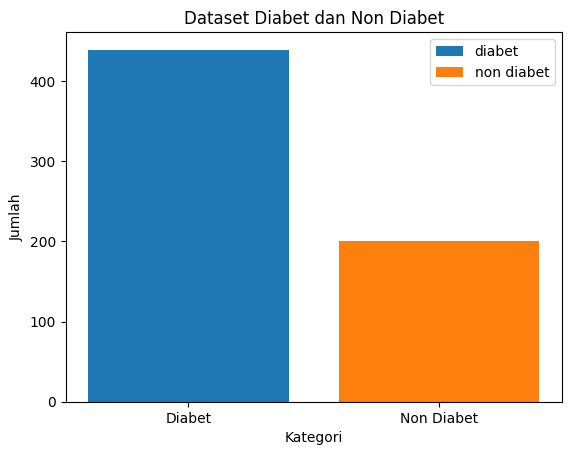

In [10]:
# Data label dan jumlahnya
label_count = dataset.Outcome.value_counts()
out = ['Diabet', 'Non Diabet']

# Membuat diagram batang
plt.bar(out[0], label_count[0])
plt.bar(out[1], label_count[1])

# Menambahkan label sumbu dan judul diagram
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Dataset Diabet dan Non Diabet')
plt.legend(['diabet', 'non diabet'])
plt.show()

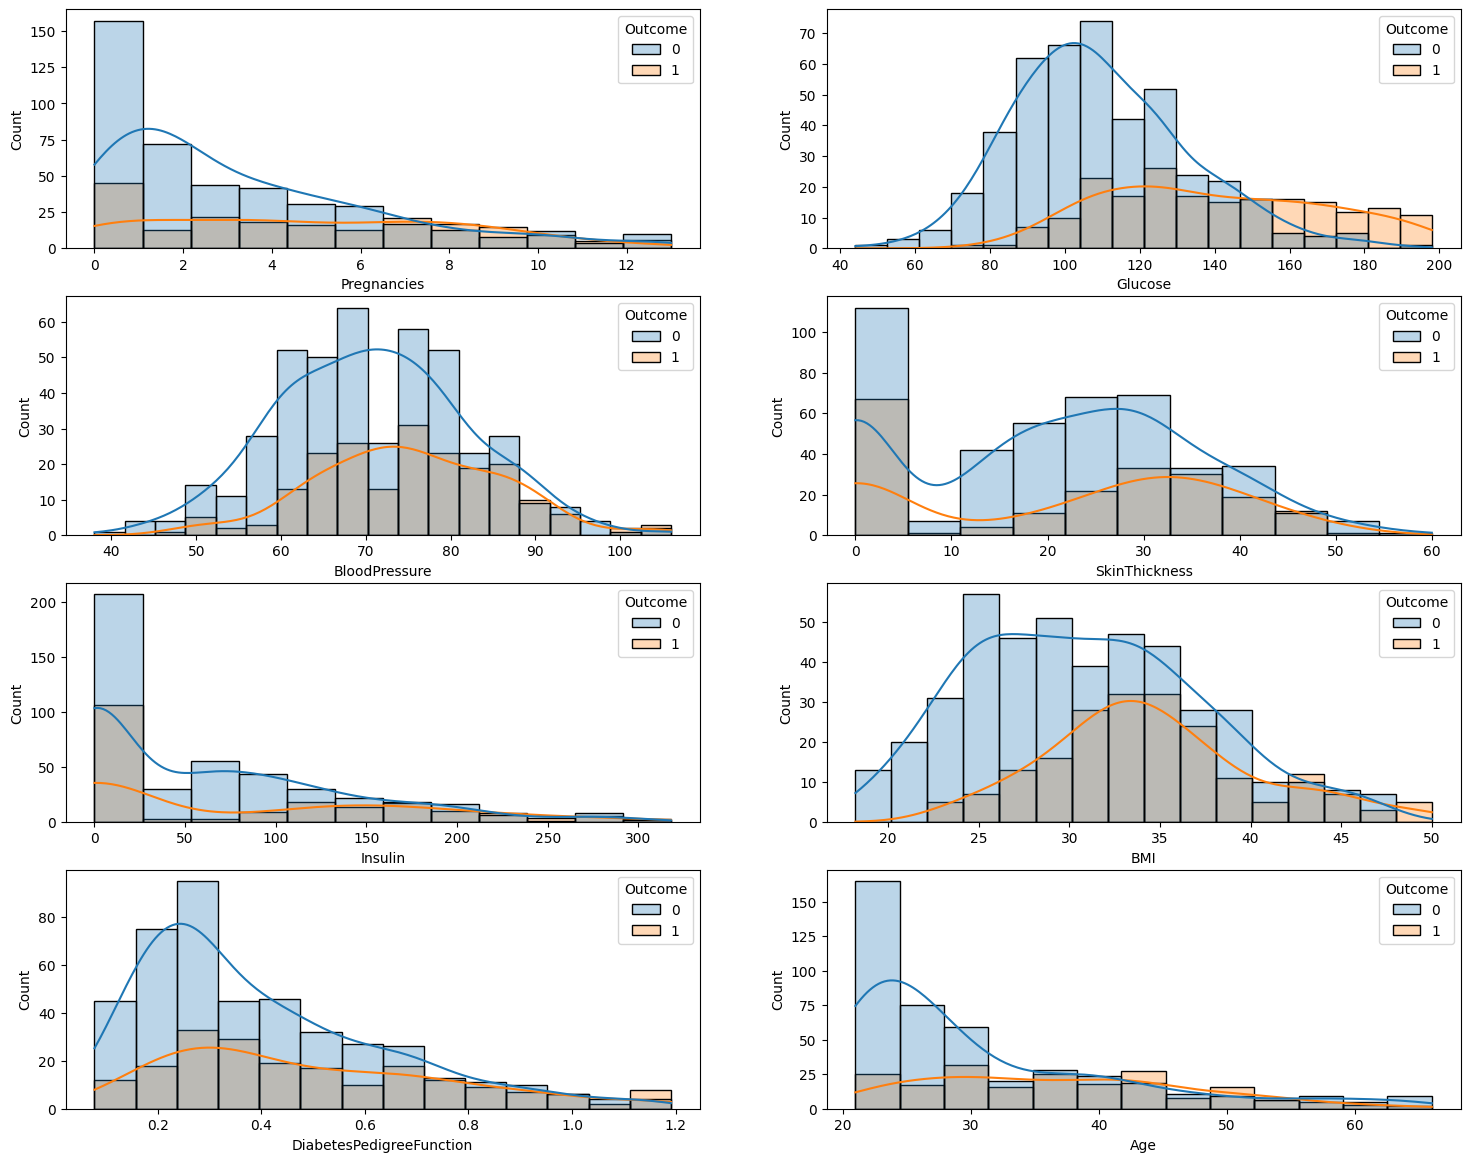

In [11]:
plt.figure(figsize=(18, 18))
list_col = dataset.drop(columns='Outcome').columns

for index, col in enumerate(list_col, start=1):
    plt.subplot(5, 2, index)
    sns.histplot(
        data=dataset,
        x=col,
        kde=True,
        hue='Outcome',
        alpha=0.3,
    )

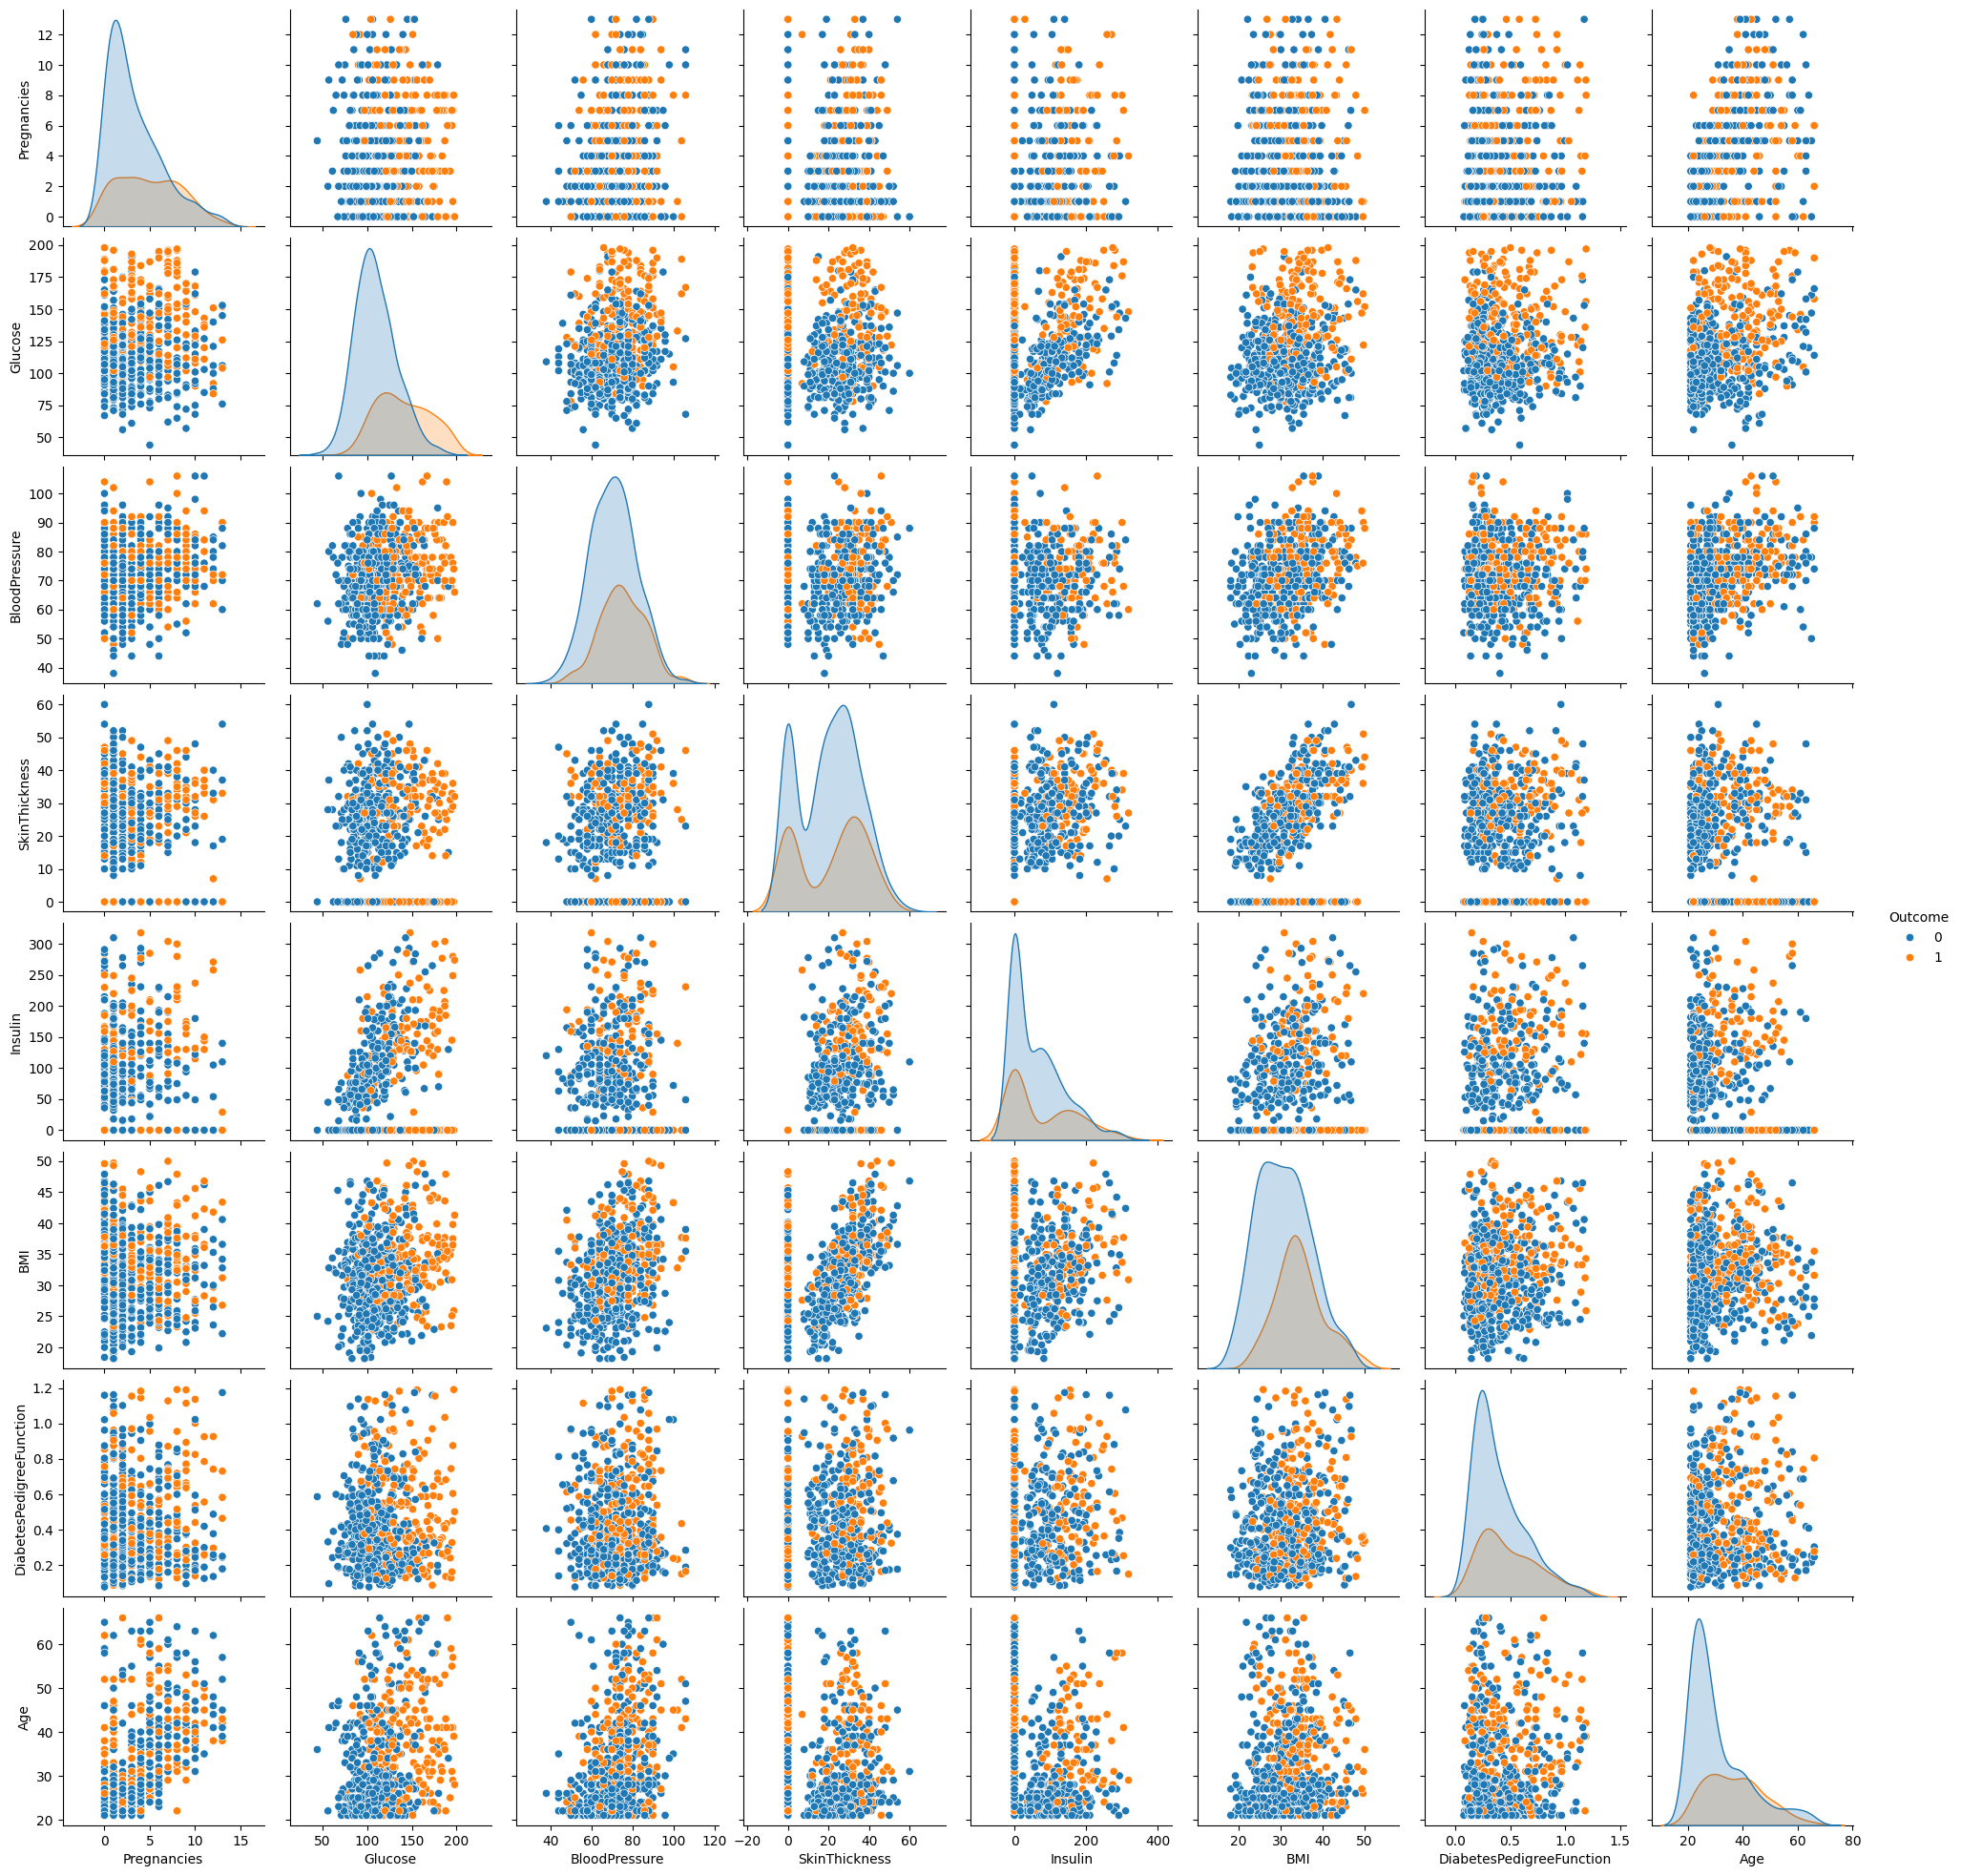

In [12]:
sns.pairplot(dataset, hue='Outcome', diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix ')

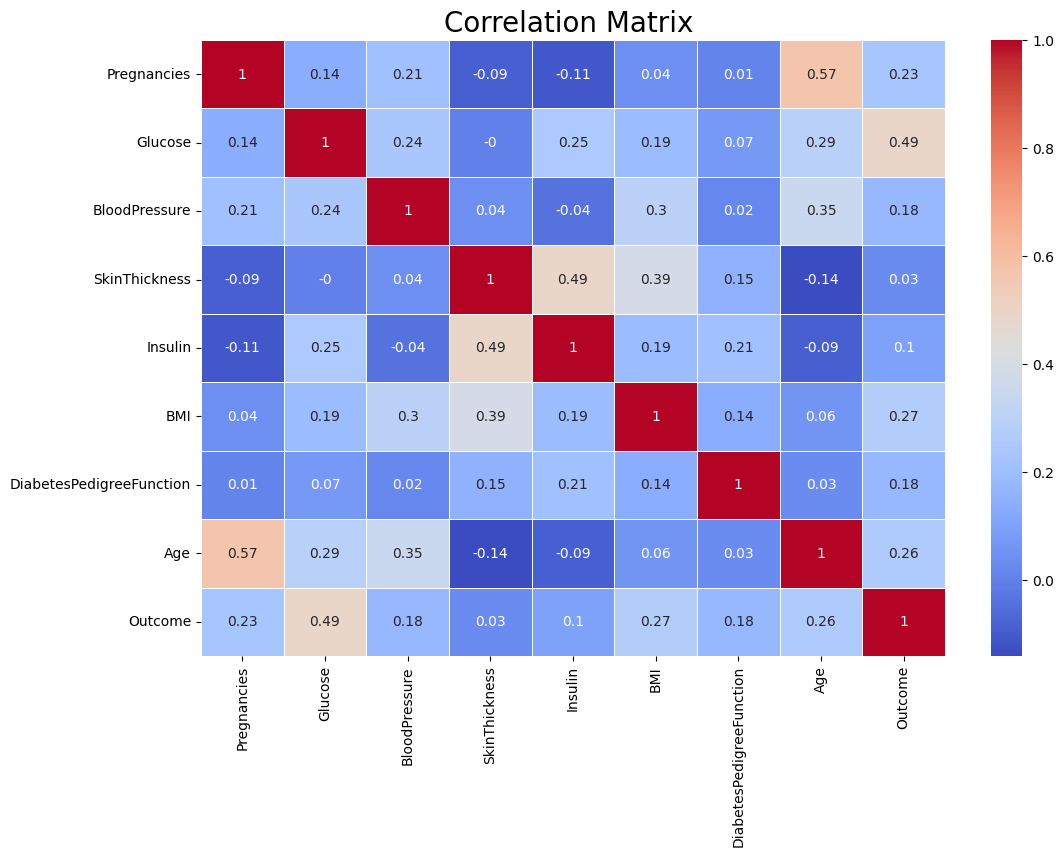

In [13]:
plt.figure(figsize=(12, 8))
corelation_matrix = dataset.corr().round(2)
sns.heatmap(data=corelation_matrix, annot=True,
            cmap='coolwarm', linewidths=0.6)
plt.title("Correlation Matrix ", size=20)

In [14]:
# - Menggunakan heatmap untuk mencari korelasi yang sangat berpengaruh dengan diabetes.
# Dari data set diperoleh urutan dari yang paling berpengaruh yaitu Glucosa, BMI, Age, Pregnancies, BloodPressure, DiabetesPedingFreeFunction, Insulin, dan yang paling jauh Insulin
np.sort([1, 0.26, 0.18, 0.27, 0.1, 0.03, 0.18, 0.49, 0.23])

array([0.03, 0.1 , 0.18, 0.18, 0.23, 0.26, 0.27, 0.49, 1.  ])

Data Preparation


In [15]:
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 639
Total # of sample in train dataset: 511
Total # of sample in test dataset: 128


In [16]:
list_matrix = []

In [17]:
def append_matrix(name: str, accuracy: float, precision: float, recall: float, f1: float, roc_auc: float):
    list_matrix.append({
        'name': name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    })

In [18]:
model_dict = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

In [19]:
for name, model in model_dict.items():
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    append_matrix(name, acc, prec, rec, f1, roc_auc)

In [20]:
result_eval = pd.DataFrame(list_matrix)
result_eval

,name,accuracy,precision,recall,f1,roc_auc
0,DecisionTreeClassifier,0.734375,0.526316,0.555556,0.540541,0.679952
1,RandomForestClassifier,0.843750,0.735294,0.694444,0.714286,0.798309
2,GradientBoostingClassifier,0.851562,0.774194,0.666667,0.716418,0.795290
3,AdaBoostClassifier,0.812500,0.714286,0.555556,0.625000,0.734300


In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse']
}

# best = 0.0
# epoch = 0
# while (best <= 0.75 and epoch < 101):
# epoch += 1
# print(epoch)


def custom_f1(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='micro')
    return 1 if f1 >= 0.8 else 0


clf = GradientBoostingClassifier()

grid_search = GridSearchCV(
    clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_macro')

grid_search.fit(X_train, y_train)

# Membuat model dengan hyperparameter terbaik
current_best_clf = grid_search.best_estimator_

# Melakukan prediksi
y_pred = current_best_clf.predict(X_test)

# Menghitung metrik evaluasi
prec = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="micro")
roc_auc = roc_auc_score(y_test, y_pred)
current_best_clf

# Setelah loop selesai, Anda memiliki model terbaik
print("Model Terbaik:")
print(f1)

Model Terbaik:
0.8125


In [23]:
current_best_clf

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=8,
                           min_samples_split=10, n_estimators=300,
                           subsample=0.8)